In [26]:
from matplotlib import pyplot
from montecarlo import SSA, SSAModel


# initial species counts and sojourn times
initital_conditions = {
    "s": [480],
    "i": [20],
    "r": [0],
    "d": [0],
    "time": [0.0],
}


# propensity functions
propensities = {
    0: lambda d: (2.0/100.0) * d["s"][-1] * d["i"][-1],
    1: lambda d: 0.1 * d["i"][-1],
    2: lambda d: 0.5 * d["i"][-1],
}


# change in species for each propensity
stoichiometry = {
    0: {"s": -1, "i": 1, "r": 0, "d": 0},
    1: {"s": 0, "i": -1, "r": 0, "d": 1},
    2: {"s": 0, "i": -1, "r": 1, "d": 0}
}


# instantiate the epidemic SSA model
epidemic = SSAModel(
    initital_conditions,
    propensities,
    stoichiometry
)


# instantiate the SSA container with model
epidemic_generator = SSA(epidemic)


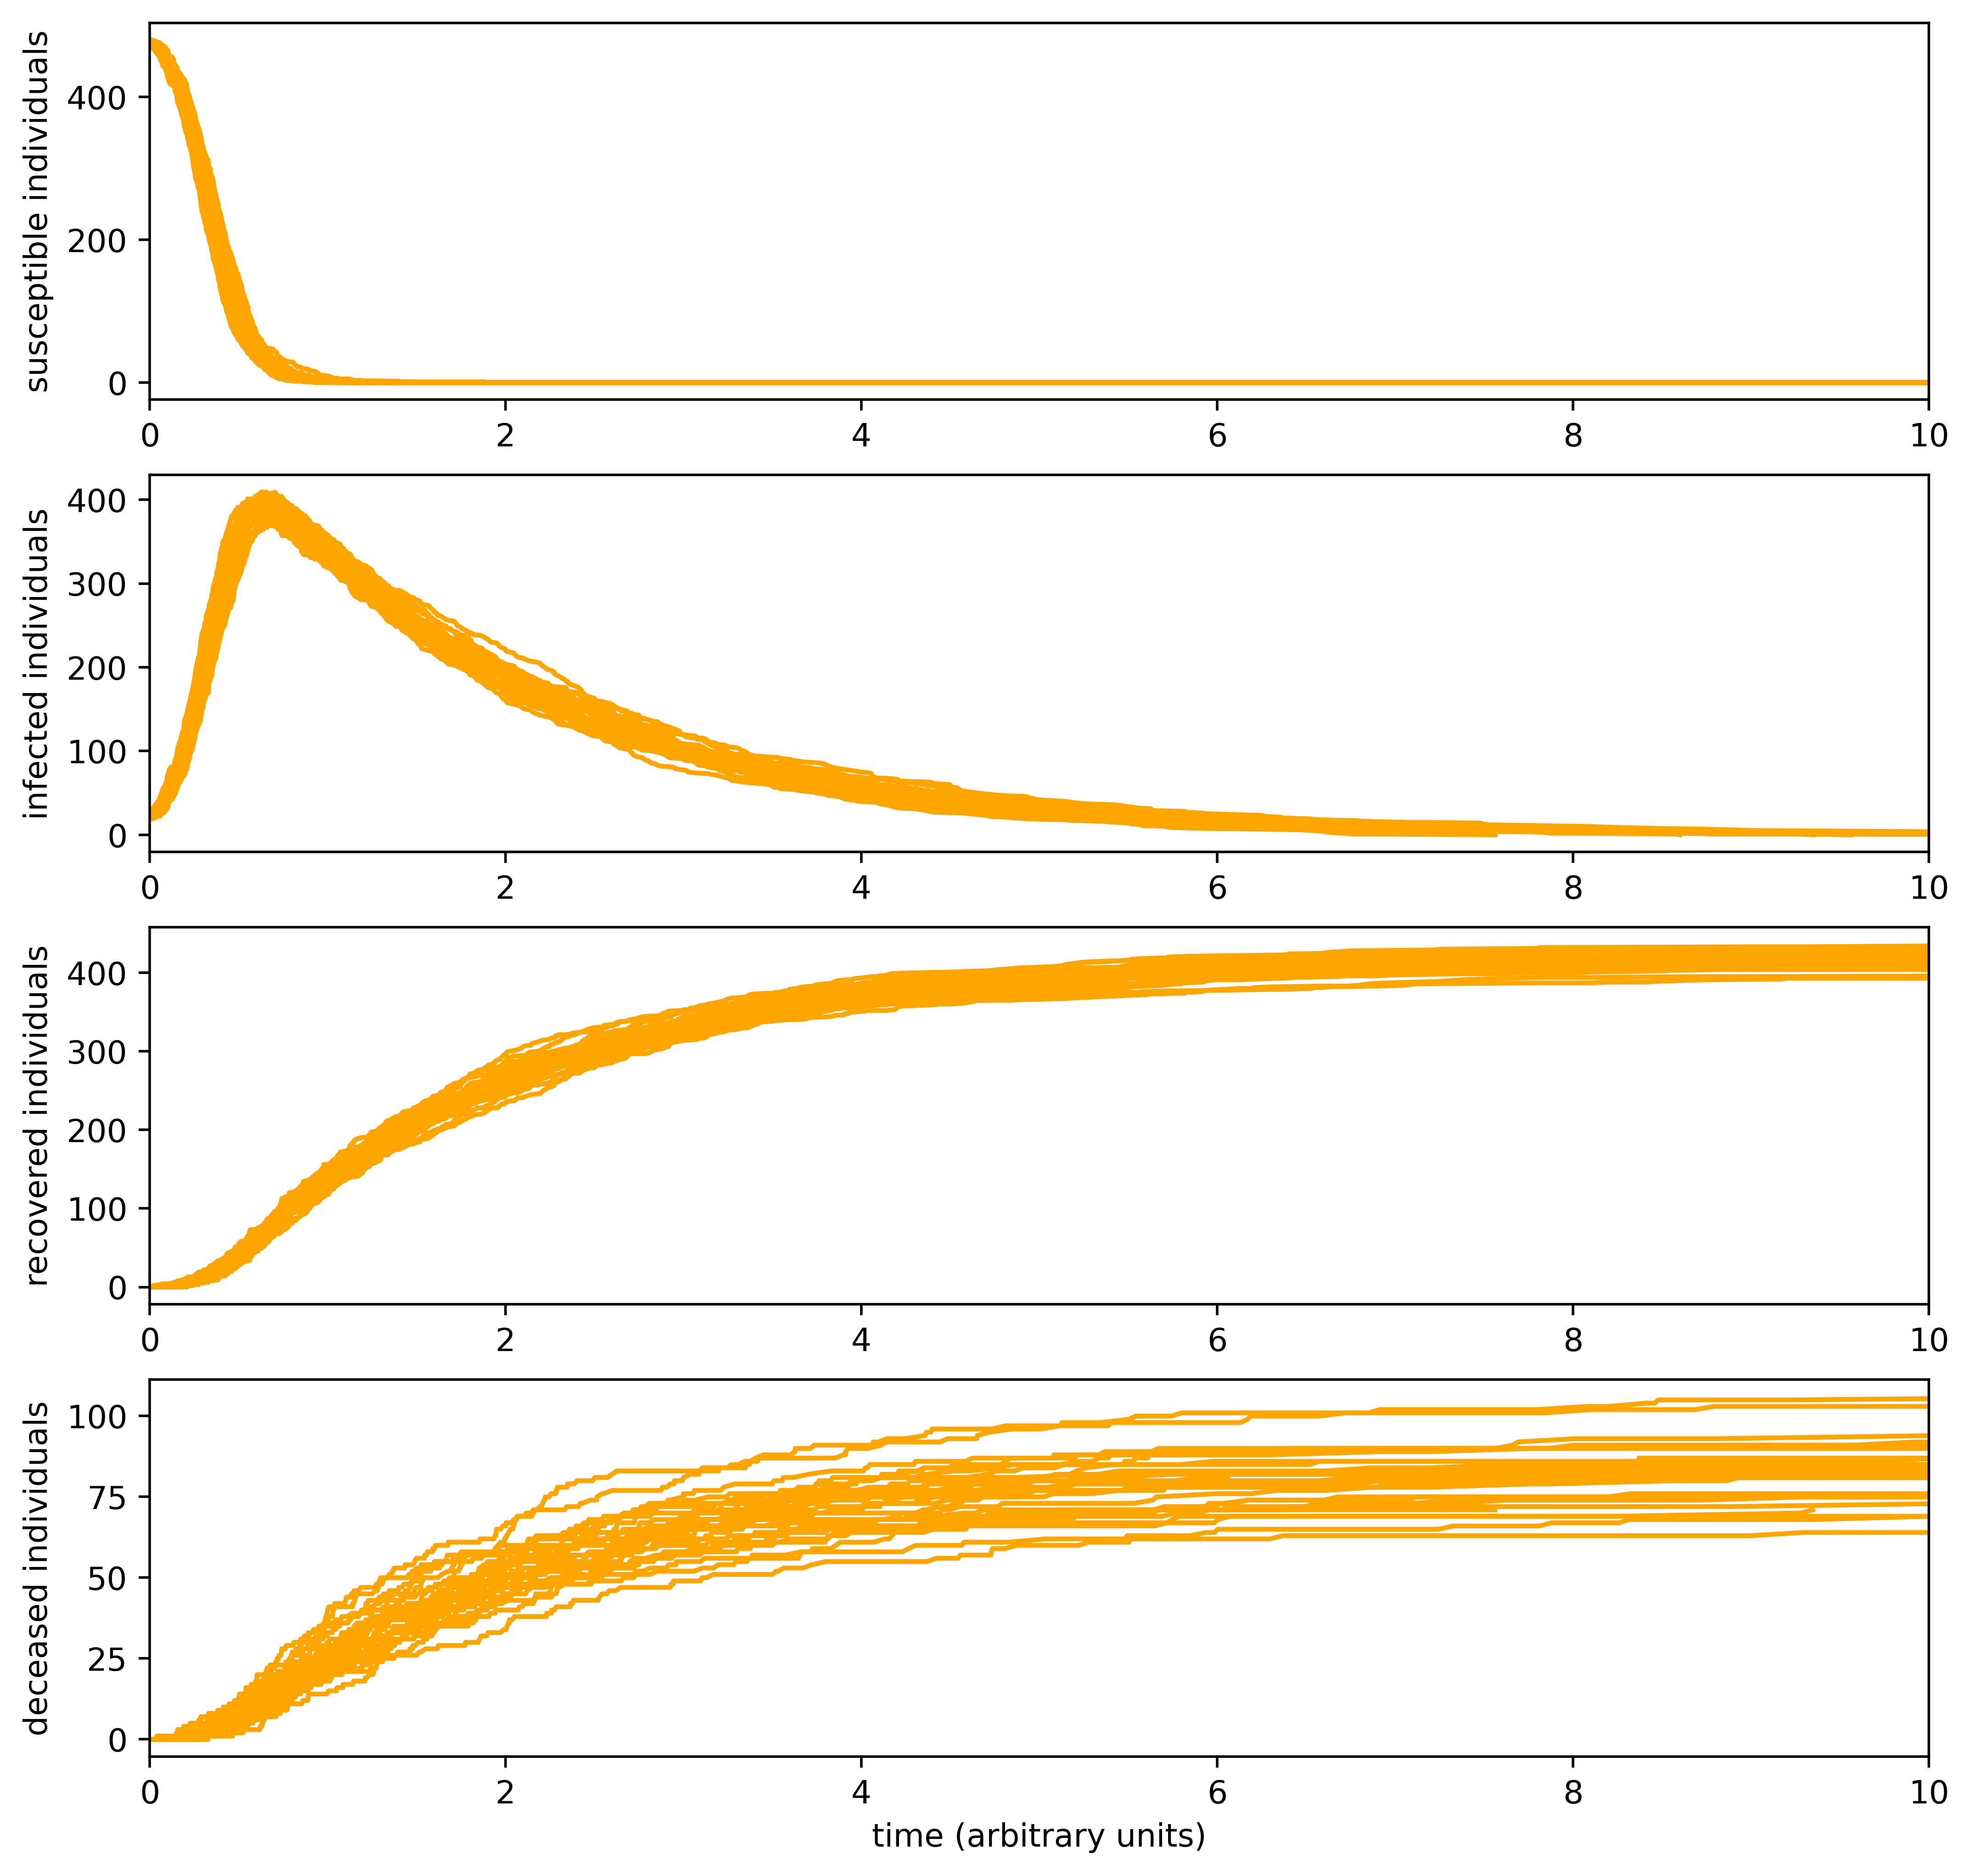

In [27]:
# make a nice, big figure
pyplot.figure(figsize=(10,10), dpi=500)


# make a subplot for susceptible individuals
axes_s = pyplot.subplot(411)
axes_s.set_xlim(0,10)
axes_s.set_ylabel("susceptible individuals")

# make a subplot for infected individuals
axes_i = pyplot.subplot(412)
axes_i.set_xlim(0,10)
axes_i.set_ylabel("infected individuals")

# make a subplot for recovered individuals
axes_r = pyplot.subplot(413)
axes_r.set_xlim(0,10)
axes_r.set_ylabel("recovered individuals")

# make a subplot for deceased individuals
axes_d = pyplot.subplot(414)
axes_d.set_xlim(0,10)
axes_d.set_ylabel("deceased individuals")
axes_d.set_xlabel("time (arbitrary units)")


# simulate and plot acceptable trajectories
trajectories = 0
for trajectory in epidemic_generator.direct():
    axes_s.plot(trajectory["time"], trajectory["s"], color="orange")
    axes_i.plot(trajectory["time"], trajectory["i"], color="orange")
    axes_r.plot(trajectory["time"], trajectory["r"], color="orange")
    axes_d.plot(trajectory["time"], trajectory["d"], color="orange")
    trajectories += 1
    if trajectories == 30:
        break

pyplot.show()


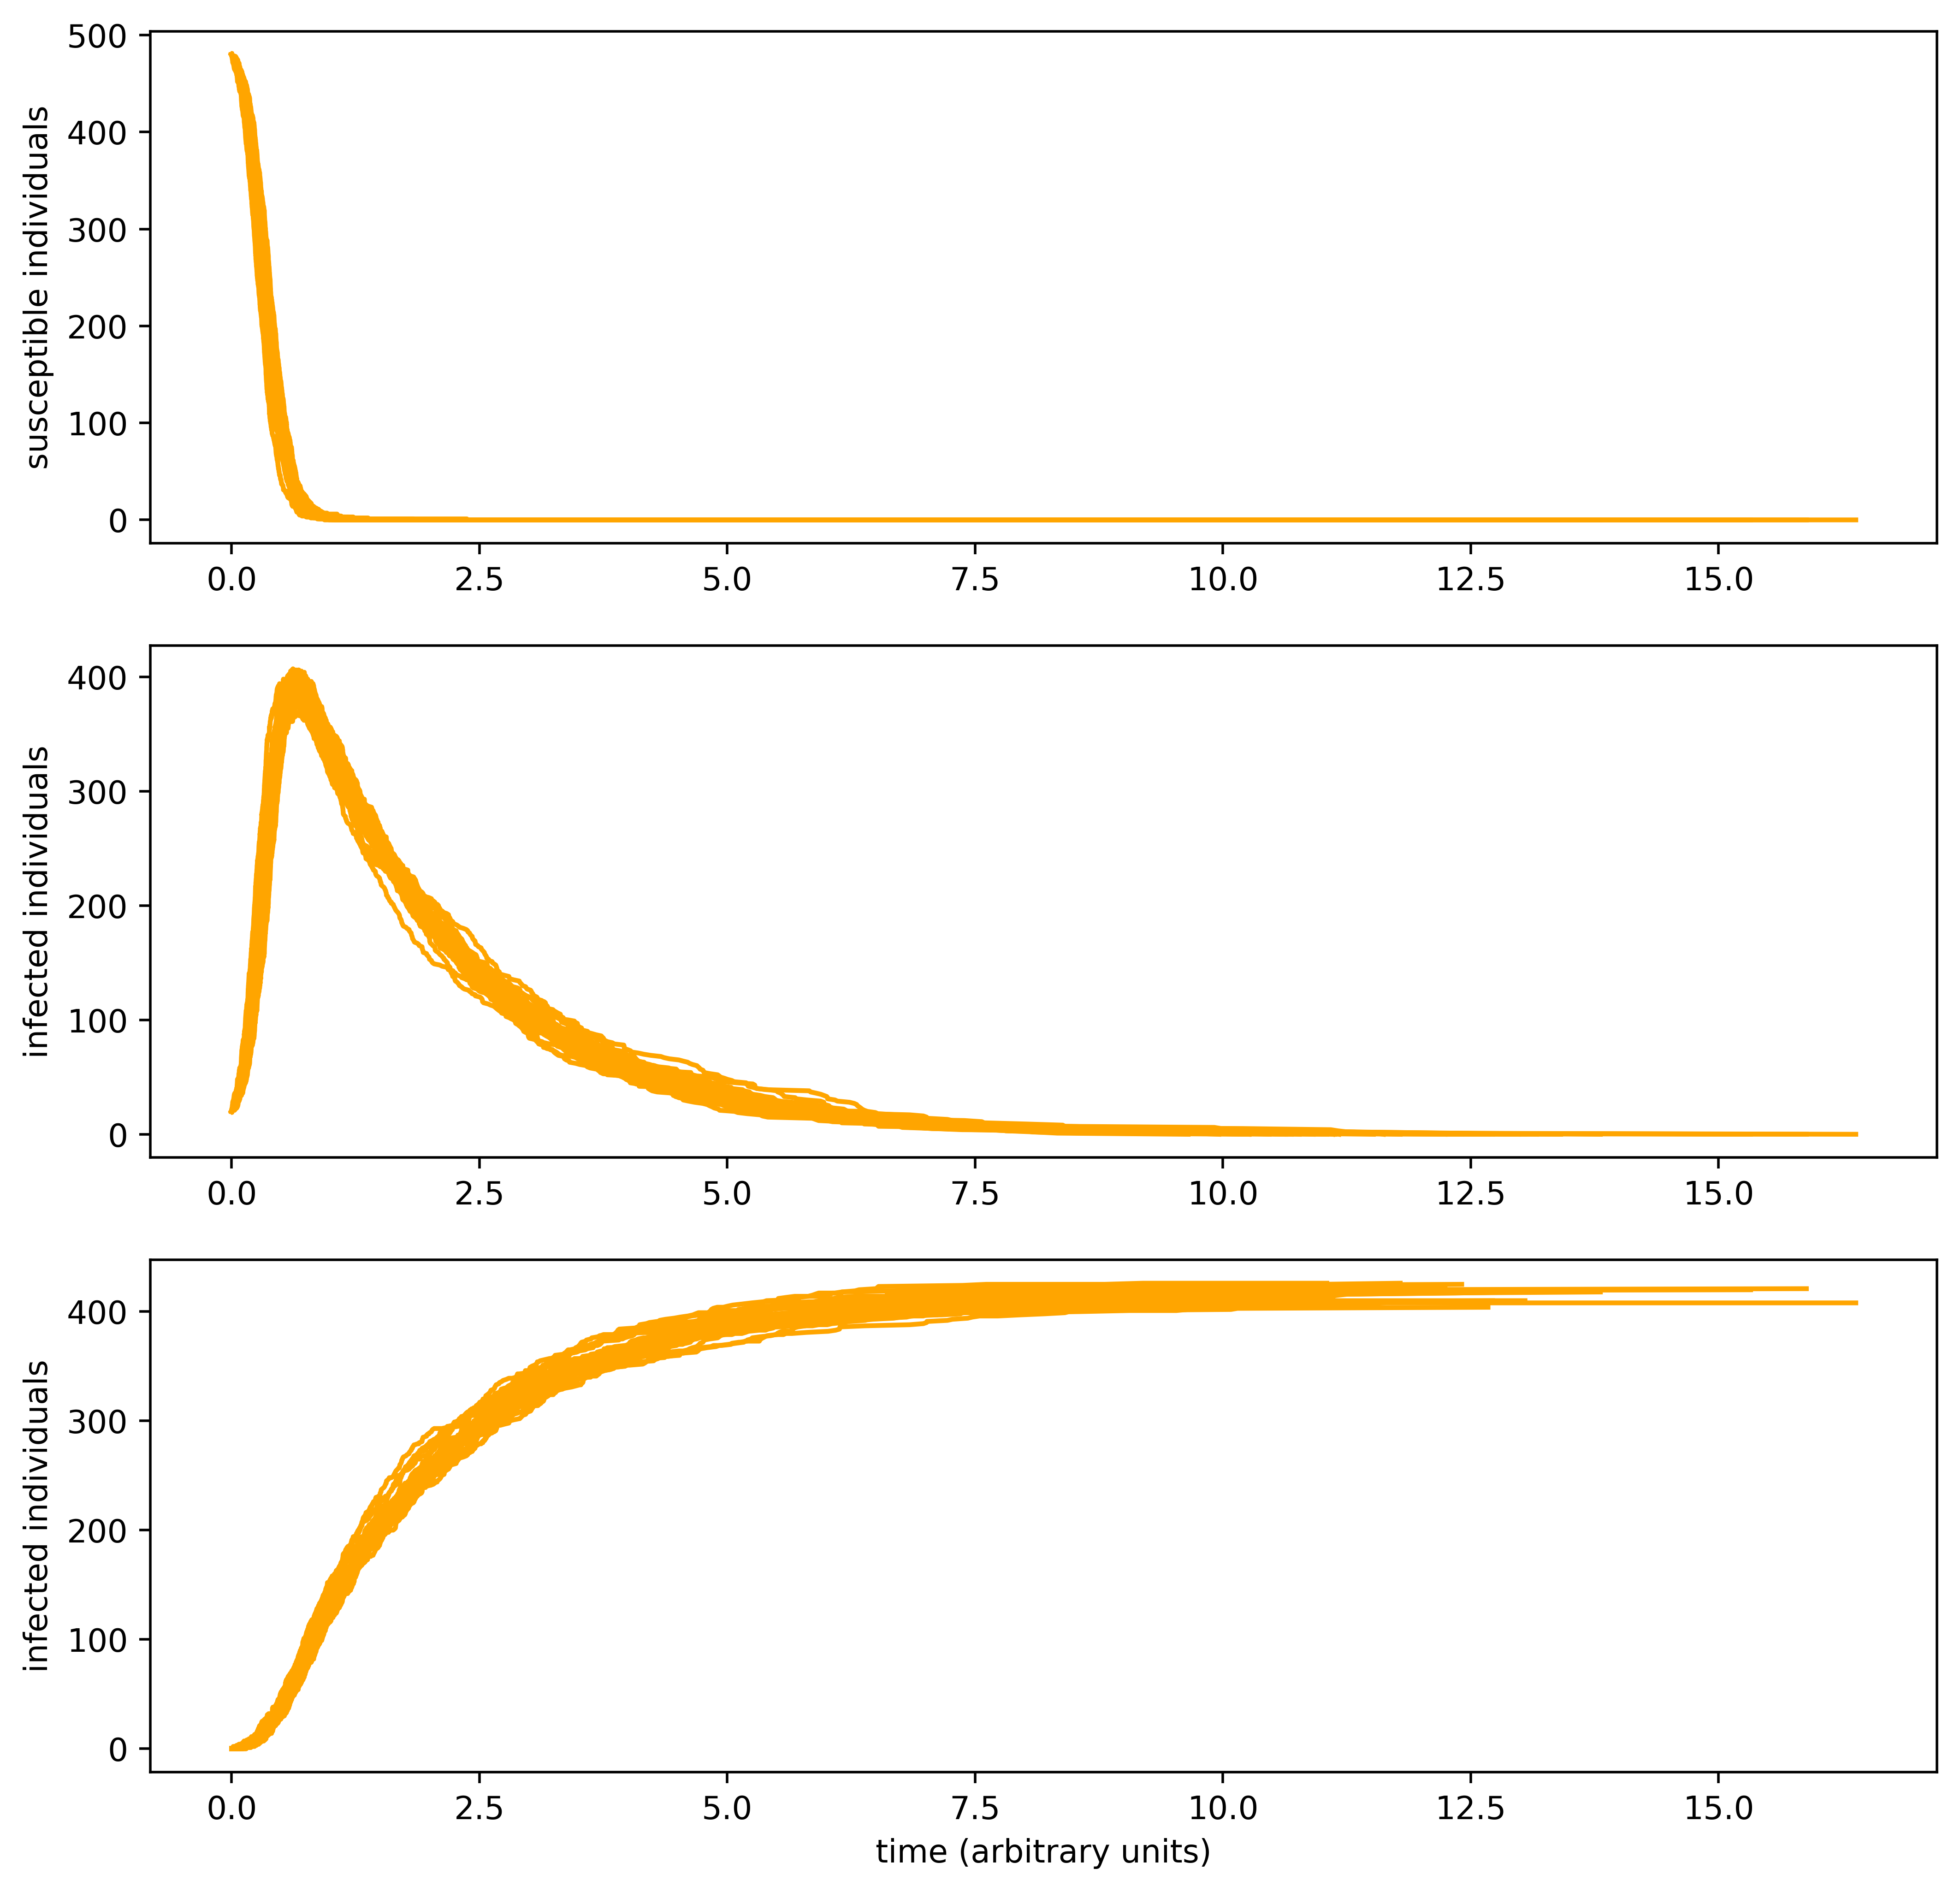

In [29]:
# make a nice, big figure
pyplot.figure(figsize=(10,10), dpi=500)


# make a subplot for susceptible individuals
axes_s = pyplot.subplot(311)
axes_s.set_ylabel("susceptible individuals")

# make a subplot for infected individuals
axes_i = pyplot.subplot(312)
axes_i.set_ylabel("infected individuals")

# make a subplot for recovered individuals
axes_r = pyplot.subplot(313)
axes_r.set_ylabel("infected individuals")
axes_r.set_xlabel("time (arbitrary units)")



# testing the first-reaction method
trajectories = 0
for trajectory in epidemic_generator.first_reaction():
    axes_s.plot(trajectory["time"], trajectory["s"], color="orange")
    axes_i.plot(trajectory["time"], trajectory["i"], color="orange")
    axes_r.plot(trajectory["time"], trajectory["r"], color="orange")
    trajectories += 1
    if trajectories == 30:
        break

pyplot.show()


# Stochastic simulation algorithm
Will Fatherley
<hr>

## Summary
The _stochastic simulation algorithm_ (SSA) was developed over the twentieth century, like most other Monte Carlo methods. A sizeable body of the literature is dedicated to either improving it's complexity, or implementing it to investigate the properties of reactive chemical mixtures. Here, two versions are introduced, used them to simulate the SIR epidemic, and their complexity is discussed.

## Introduction
It is likely that the SSA has been well-formulated in probability theory for a good deal of time, but in the context of this discussion, it was first described in 1976 by Daniel T. Gillespie as _a systematic, computer-oriented procedure in which rigorously derived Monte Carlo techniques are employed to numerically simulate the very Markov process that the master equation describes analytically._ Said differently, the SSA can be used to produce solution curves for ordinary differential equations of most any variety. In Gillespie's works, the SSA was demonstrated to solve certain ODEs in chemical kinetics-- specifically for reactive chemical mixtures that admit the Stosszahlansatz.

Regardless of the ontological aspects involved in Gillespie's work deriving the SSA, it is again broadly applicable to the processes that surround or involve us. Consider as an example the SIR epidmeic, in which a population of individuals transition irreversibly from susceptible ($S$), to infected ($I$) and recovered ($R$) states. Suppose further that the timescale of this epidemic is significantly shorter than the average lifespan of any individual, but also that the infective material is lethal (i.e. individuals can die in the infected state). This epidemic is rather like the COVID-19 pandemic, and consists schematically of the following possible transitions

$$S \rightarrow I$$

$$I \rightarrow \phi$$

$$I \rightarrow R$$

where $\phi$ is the "dead" state. Deriving an ODE for this model is simple. The basic idea is that there exist real-valued functions $p_{S}$, $p_{I}$, and $p_{R}$, each accepting a real "time" parameter $t \geq 0$, whereby each represents the probability of being in that respective state at time $t$. What is saught is an expression for $p_{X}(t+dt)$, and this expression is what governs each $p_{X}$. The process therefore involves summing up for each state all probabilistic contributions.

Starting with $p_{S}$, it is seen from the schemata above that individuals can either stay or leave the susceptible state, i.e. no individual transitions into the susceptible state over $dt$ if they are not already in it. Thus the expression for $p_{S}(t+dt)$ is 

$$p_{S}(t)\times[1 - \text{probability of transitioning to infected state}]$$

which is read as "the probability of being susceptible _and not_ transitioning to the infected state. What is the _probability of transitioning to infected state?_ It is given by $p_{I}(t) \alpha dt$, where $\alpha dt$ is a volume-intensive, per-capita probability of disease transmission in a contact between a susceptible- and infected-individual. Note that there are other forms of this expression. So then,

$$p_{S}(t+dt) = p_{S}(t)\times[1 - p_{I}(t) \alpha dt],$$

and rearranging,

$$p_{S}(t+dt) - p_{S}(t) = - p_{S}(t)p_{I}(t) \alpha dt.$$

Dividing both sides by $dt$ and applying the $\lim_{dt\rightarrow0}$ operator yields the ODE for the susceptible state--

$$\frac{p_{S}}{dt} = - p_{S}p_{I}\alpha.$$


## References

\[1\] Gillespie, Daniel T. (2007). "Stochastic Simulation of Chemical Kinetics". The Journal of Physical Chemistry. 58: 35–55.
\[2\] Gillespie, Daniel T. (1976). "A General Method for Numerically Simulating the Stochastic Time Evolution of Coupled Chemical Reactions". Journal of Computational Physics. 22 (4): 403–434.